### Cria a composição temporal 

- Usa o canal SCL.
- Os valores de obsercação limpa são: 4, 5 e 6
- É feita a quebra em subtiles


In [1]:
# imports

import os
import sys
sys.path.append(os.path.abspath('..'))
from rasterio.coords import BoundingBox

import src.data.subtile_composition as subtile_composition


     

### Algumas definições
- Número de subtiles: 12x12.
- Gerando para o tile 032027
- Raiz do caminho com dados brutos: data/raw
- Raiz do caminho dos resultados: data/processed
- É criada uma parta chamada S2-D16_V2_{tile}, e uma subpasta chamada {num_subtiles}x{num_subtiles}_subtiles.
- São salvos valores int16, de dimensões (12, width, height)
- Width e height são 10560/num_subtiles
- Não há sobreposição/overlap


In [2]:
working_dir = os.path.abspath('..')
raw_data_path = os.path.join(working_dir,'data/raw')
processed_data_path = os.path.join(working_dir,'data/processed')
num_subtiles = 12
tile = '032027'
subtile_composition.create_composition(in_folder=raw_data_path, 
                                        out_folder=processed_data_path,
                                        tile = tile,
                                        num_subtiles=num_subtiles)



Dates:
['20190423', '20190610', '20190712', '20190202', '20190626', '20190829', '20190509', '20190813', '20190525', '20191016', '20191219', '20191101', '20190930', '20191117', '20190728', '20190322', '20190914', '20190407', '20191203', '20190218', '20190117', '20190101', '20190306']
Creating composition of 23 dates
File /home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/12x12_subtiles/S2-16D_V2_032027_x=0_y=0.tif already exists, skipping.
File /home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/12x12_subtiles/S2-16D_V2_032027_x=0_y=880.tif already exists, skipping.
File /home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/12x12_subtiles/S2-16D_V2_032027_x=0_y=1760.tif already exists, skipping.
File /home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/12x12_subtiles/S2-16D_V2_032027_x=0_y=2640.tif already exists, skipping.
File /home/jonathan/UrbanizedAreasSegmentation/data/processed/S2-16D_V2_032027/

### Detalhes extras:

- Composição utiliza o métod da média das observações válidas
- Quando nenhuma observação é válida, é preenchido com NaN
- Foi feita a interpolação dos valores de NaN, e para distinguir, foram atribuídos valores negativos.
- Sendo assim, pra obter a imagem com interpolação basta usar np.abs
- Para obter os valores não interpolados, basta ler os valores positivos. 


### Exemplo de arquivo gerado:


In [3]:
import rasterio

composition_data_file = os.path.join(working_dir,'data/processed/S2-16D_V2_032027/12x12_subtiles/S2-16D_V2_032027_x=0_y=880.tif')
with rasterio.open(composition_data_file) as src:
    # Read the raster data
    data = src.read()

data.shape

(12, 880, 880)

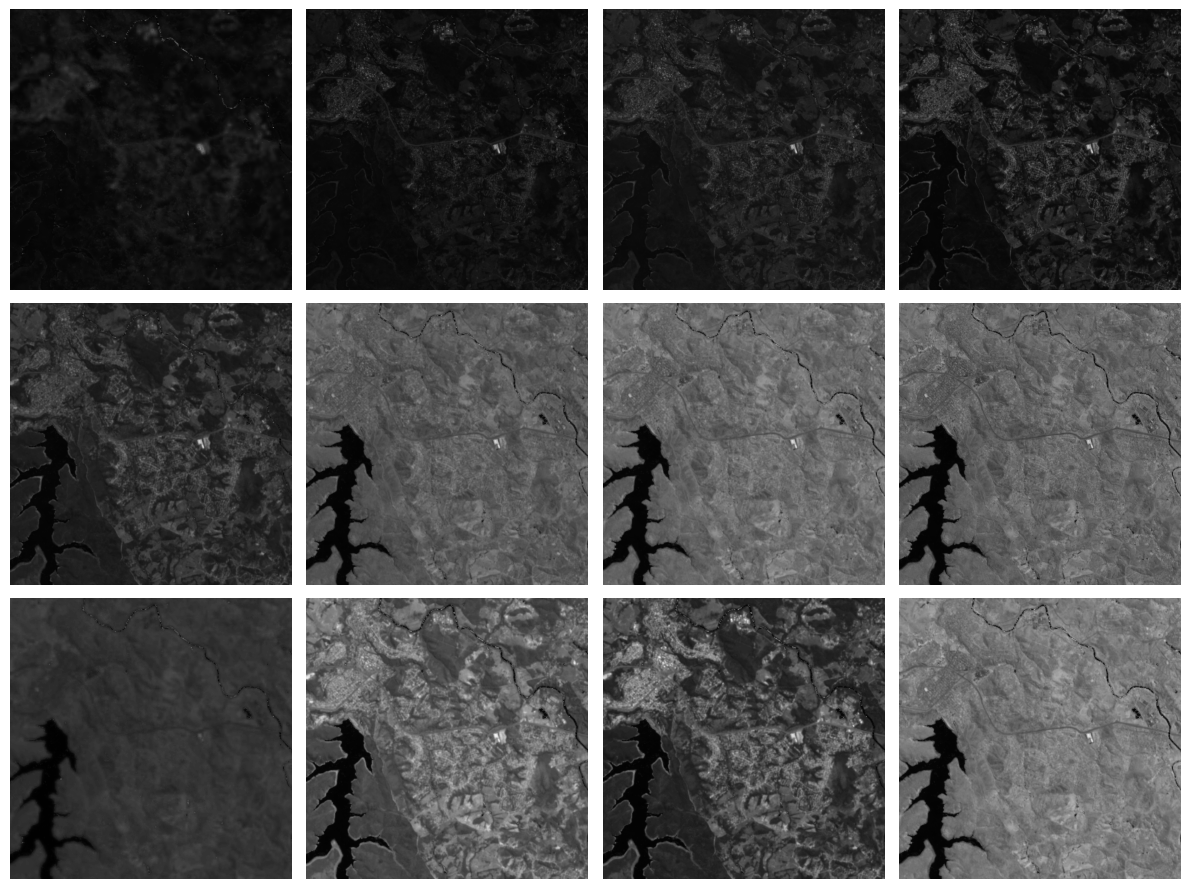

In [5]:
import numpy as np
subtile_composition.display_images(np.abs(data), limit=-1)